# LLM Image Classification with Langchain

In [1]:
!pip install -U --quiet langchain-google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.8/146.8 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.3/299.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.5/664.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.0/116.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 1.1 MB/s eta 0:00:00


In [2]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.7/817.7 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.5 MB/s eta 0:00:00


In [4]:
import os
from google.colab import userdata

os.environ['GOOGLE_API_KEY']=userdata.get('GeminiAPIKey1')

In [5]:
!curl -o picture.jpg https://i0.wp.com/www.yesilniksar.com/wp-content/uploads/2023/09/duzcede-ormanda-kacak-kesim-yapan-3-kisi-fotokapana-yakalandi_90d8267.jpg?fit=822%2C527&ssl=1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  280k  100  280k    0     0   985k      0 --:--:-- --:--:-- --:--:--  987k


In [6]:
!curl -o picture2.jpg https://cdn.pixabay.com/photo/2016/11/29/03/53/house-1867187_640.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 87289  100 87289    0     0   571k      0 --:--:-- --:--:-- --:--:--  572k


In [7]:
!curl -o picture3.jpg https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTnnqTzdpdxwWMQ4VF0TNShmAHkiUmPq5KILg&usqp=CAU

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8077  100  8077    0     0  73529      0 --:--:-- --:--:-- --:--:-- 74100


In [8]:
!curl -o picture4.jpg https://d.olay53.com/other/2021/05/31/IH3-493653-3.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 91806  100 91806    0     0  79267      0  0:00:01  0:00:01 --:--:-- 79279


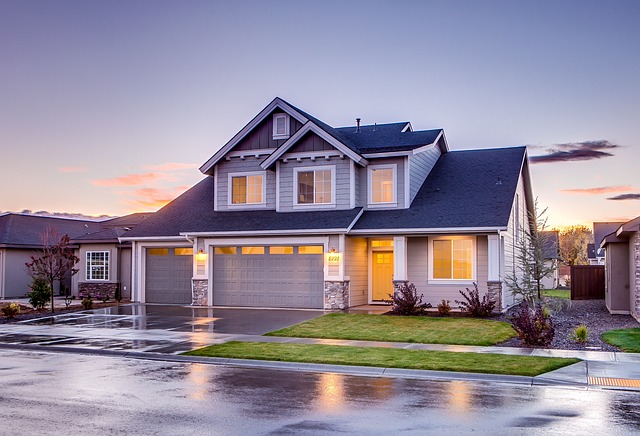

In [14]:
# Change the picture and run the codes from here again to see its classification
import PIL.Image

image = PIL.Image.open('/content/picture2.jpg')
image

## [safety_category](https://github.com/google/generative-ai-python/blob/main/google/generativeai/types/safety_types.py)

In [15]:
from langchain_google_genai import ChatGoogleGenerativeAI # , HarmBlockThreshold, HarmCategory
from google.generativeai.types.safety_types import HarmBlockThreshold, HarmCategory


from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
import textwrap

#safety_settings = {HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE}

safety_settings = {
    HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
    HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE}


llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro-vision-latest",
                             temperature=0.0,
                             safety_settings=safety_settings)


hmessage1 = HumanMessage(
    content=[
        {
            "type": "text",
            "text": """Classify image as 'human', 'animal', 'plant', 'other'. When classifying image, pay attention to the following points. \
            1. if there are not 'human', 'animal', 'plant' in the image then classify image as 'other'. \
            2. if there are human and animal or human and plant or human and other things in image then classify image as 'human'. \
            3. example_output1:{"image":"animal"}. example_output2:{"image":"human"}. example_output3:{"image":"plant"}"""
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image}
    ]
)
message = llm.invoke([hmessage1])
#print(message1.content)
message.content #return output as string

' {"image":"other"}'

In [16]:
import json

In [17]:
arguments = json.loads(message.content) #return from string to dict format
print(arguments)

{'image': 'other'}


In [18]:
arguments["image"]

'other'

END OF THE PROJECT